In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.spatial.transform import Rotation as R

In [3]:
pelvis = pd.read_csv('David-50-pokus02/Xsens_DOT_2_D422CD006474_20250409_105316.csv', skiprows= 7,  sep=',')
right = pd.read_csv('David-50-pokus02/Xsens_DOT_4_D422CD006380_20250409_105316.csv', skiprows= 7,  sep=',')
left = pd.read_csv('David-50-pokus02/Xsens_DOT_3_D422CD006379_20250409_105316.csv', skiprows= 7,  sep=',')

In [4]:
# I zero the clock at the first row, this makes all subsequent rows relative to test start
right['real_ticks'] = right['SampleTimeFine'] - right['SampleTimeFine'].iloc[0] 

# Converting the ticks to seconds and milliseconds
right['time_s'] = right['real_ticks'] * 1e-6

# Convert seconds to milliseconds
right['time_ms'] = right['time_s'] * 1000
#  show the actual intervals between samples
right['delta_ms'] = right['time_ms'].diff()

In [5]:
# I zero the clock at the first row, this makes all subsequent rows relative to test start
left['real_ticks'] = left['SampleTimeFine'] - left['SampleTimeFine'].iloc[0] 

# Converting the ticks to seconds and milliseconds
left['time_s'] = left['real_ticks'] * 1e-6

# Convert seconds to milliseconds
left['time_ms'] = left['time_s'] * 1000
#  show the actual intervals between samples
left['delta_ms'] = left['time_ms'].diff()

In [6]:
# I zero the clock at the first row, this makes all subsequent rows relative to test start
pelvis['real_ticks'] = pelvis['SampleTimeFine'] - pelvis['SampleTimeFine'].iloc[0] 

# Converting the ticks to seconds and milliseconds
pelvis['time_s'] = pelvis['real_ticks'] * 1e-6

# Convert seconds to milliseconds
pelvis['time_ms'] = pelvis['time_s'] * 1000
#  show the actual intervals between samples
pelvis['delta_ms'] = pelvis['time_ms'].diff()

In [7]:
left[['Acc_Z', 'time_ms']].describe()

,Acc_Z,time_ms
count,714.000000,714.000000
mean,-0.700330,5941.785500
std,7.570564,3437.707639
min,-118.324677,0.000000
25%,-0.442718,2970.892750
50%,-0.274222,5941.785500
75%,-0.130720,8912.678250
max,78.803986,11883.571000


In [8]:
right[['Acc_Z', 'time_ms']].describe()

,Acc_Z,time_ms
count,714.000000,714.000000
mean,0.222189,5941.785500
std,6.200612,3437.707639
min,-76.270897,0.000000
25%,0.462650,2970.892750
50%,0.611152,5941.785500
75%,0.716772,8912.678250
max,61.684147,11883.571000


In [9]:
pelvis[['Acc_Z', 'time_ms']].describe()

,Acc_Z,time_ms
count,714.000000,714.000000
mean,0.918807,5941.785500
std,2.947429,3437.707639
min,-11.779617,0.000000
25%,0.398912,2970.892750
50%,0.470544,5941.785500
75%,0.582024,8912.678250
max,32.806664,11883.571000


<Axes: title={'center': 'Pelvis Acc Z vs Time'}, xlabel='time_ms'>

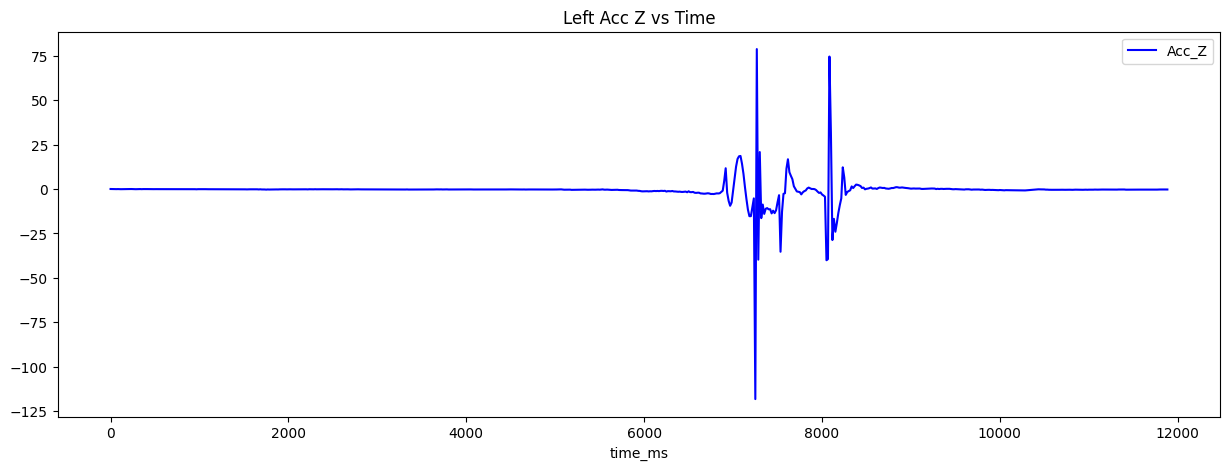

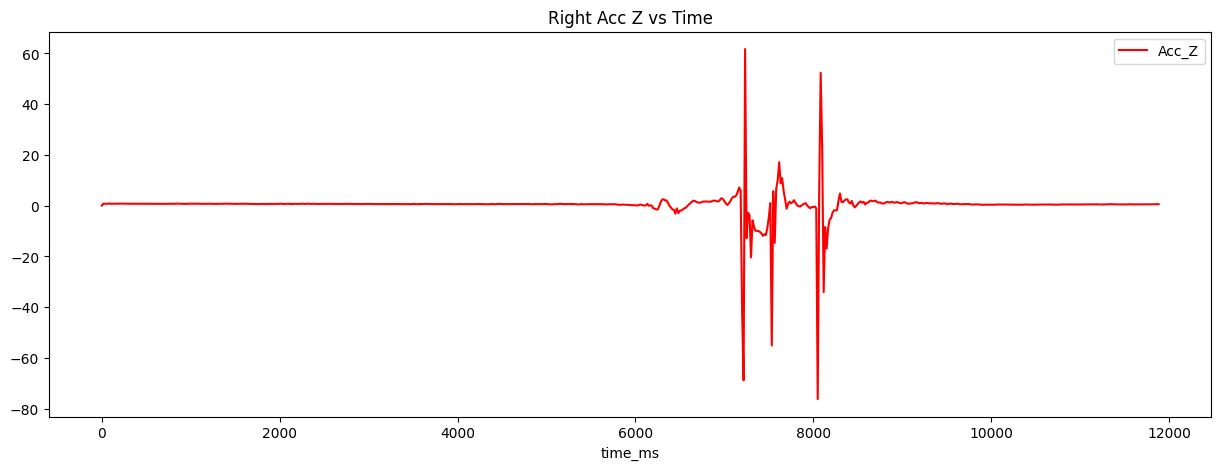

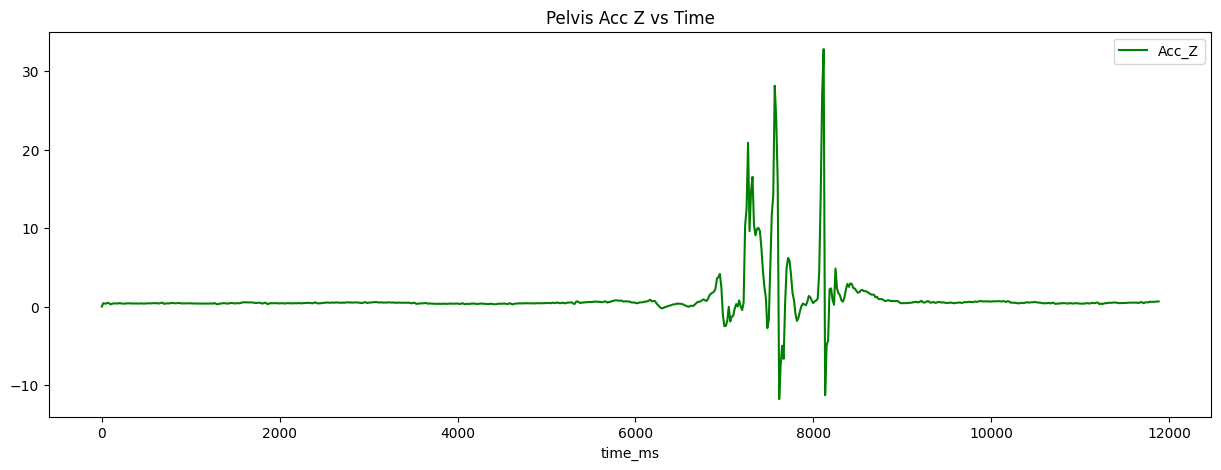

In [10]:
# visualize the data and find the connection between the accelerometer  and times 
left.plot(x='time_ms', y='Acc_Z', title='Left Acc Z vs Time', figsize=(15, 5), color='blue')
right.plot(x='time_ms', y='Acc_Z', title='Right Acc Z vs Time', figsize=(15, 5), color='red')
pelvis.plot(x='time_ms', y='Acc_Z', title='Pelvis Acc Z vs Time', figsize=(15, 5), color='green')

In [14]:
# Correlation matrix between left columns
left.corr().style.background_gradient(cmap='coolwarm')

,PacketCounter,SampleTimeFine,Euler_X,Euler_Y,Euler_Z,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,real_ticks,time_s,time_ms,delta_ms
PacketCounter,1.000000,1.000000,-0.788116,0.210122,0.801457,-0.006170,-0.055187,-0.029849,0.002282,0.012684,0.015074,1.000000,1.000000,1.000000,-0.084911
SampleTimeFine,1.000000,1.000000,-0.788116,0.210122,0.801457,-0.006170,-0.055187,-0.029849,0.002282,0.012684,0.015074,1.000000,1.000000,1.000000,-0.084911
Euler_X,-0.788116,-0.788116,1.000000,0.203119,-0.701555,-0.005706,0.092557,-0.045163,-0.075210,-0.032523,-0.117295,-0.788116,-0.788116,-0.788116,0.081563
Euler_Y,0.210122,0.210122,0.203119,1.000000,0.434003,-0.043956,-0.017008,-0.074424,0.076143,-0.045662,-0.282829,0.210122,0.210122,0.210122,0.019435
Euler_Z,0.801457,0.801457,-0.701555,0.434003,1.000000,0.050074,-0.054379,-0.049962,0.047044,-0.047316,-0.026762,0.801457,0.801457,0.801457,-0.061813
Acc_X,-0.006170,-0.006170,-0.005706,-0.043956,0.050074,1.000000,-0.370548,0.225711,-0.050198,-0.222407,0.195088,-0.006170,-0.006170,-0.006170,0.015955
Acc_Y,-0.055187,-0.055187,0.092557,-0.017008,-0.054379,-0.370548,1.000000,-0.261414,0.030511,-0.081421,-0.016900,-0.055187,-0.055187,-0.055187,-0.023692
Acc_Z,-0.029849,-0.029849,-0.045163,-0.074424,-0.049962,0.225711,-0.261414,1.000000,-0.246828,-0.089375,-0.237176,-0.029849,-0.029849,-0.029849,0.040944
Gyr_X,0.002282,0.002282,-0.075210,0.076143,0.047044,-0.050198,0.030511,-0.246828,1.000000,-0.050040,0.019383,0.002282,0.002282,0.002282,0.034164
Gyr_Y,0.012684,0.012684,-0.032523,-0.045662,-0.047316,-0.222407,-0.081421,-0.089375,-0.050040,1.000000,0.549049,0.012684,0.012684,0.012684,-0.008381


In [12]:
# Correlation matrix between right columns
right.corr().style.background_gradient(cmap='coolwarm')

,PacketCounter,SampleTimeFine,Euler_X,Euler_Y,Euler_Z,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,real_ticks,time_s,time_ms,delta_ms
PacketCounter,1.000000,1.000000,0.449996,0.147763,-0.537865,-0.008566,0.063485,-0.034783,-0.001288,0.005498,0.017594,1.000000,1.000000,1.000000,-0.084911
SampleTimeFine,1.000000,1.000000,0.449996,0.147763,-0.537865,-0.008566,0.063485,-0.034783,-0.001288,0.005498,0.017594,1.000000,1.000000,1.000000,-0.084911
Euler_X,0.449996,0.449996,1.000000,0.541308,-0.778774,0.132640,0.177224,-0.103669,0.022065,-0.157949,0.044139,0.449996,0.449996,0.449996,-0.016552
Euler_Y,0.147763,0.147763,0.541308,1.000000,-0.557169,0.051262,0.194899,-0.223510,-0.037971,-0.069917,0.207766,0.147763,0.147763,0.147763,0.025479
Euler_Z,-0.537865,-0.537865,-0.778774,-0.557169,1.000000,-0.115706,-0.148054,0.110763,-0.002440,0.043607,-0.118956,-0.537865,-0.537865,-0.537865,0.025713
Acc_X,-0.008566,-0.008566,0.132640,0.051262,-0.115706,1.000000,0.263516,0.117357,0.245488,-0.070274,-0.244037,-0.008566,-0.008566,-0.008566,-0.006353
Acc_Y,0.063485,0.063485,0.177224,0.194899,-0.148054,0.263516,1.000000,0.224272,0.381579,0.179610,-0.225426,0.063485,0.063485,0.063485,0.008781
Acc_Z,-0.034783,-0.034783,-0.103669,-0.223510,0.110763,0.117357,0.224272,1.000000,0.305178,0.067032,-0.316057,-0.034783,-0.034783,-0.034783,0.047840
Gyr_X,-0.001288,-0.001288,0.022065,-0.037971,-0.002440,0.245488,0.381579,0.305178,1.000000,-0.172423,-0.158194,-0.001288,-0.001288,-0.001288,-0.015150
Gyr_Y,0.005498,0.005498,-0.157949,-0.069917,0.043607,-0.070274,0.179610,0.067032,-0.172423,1.000000,0.052674,0.005498,0.005498,0.005498,0.011733


In [13]:
pelvis.corr().style.background_gradient(cmap='coolwarm')

,PacketCounter,SampleTimeFine,Euler_X,Euler_Y,Euler_Z,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,real_ticks,time_s,time_ms,delta_ms
PacketCounter,1.000000,1.000000,-0.183689,0.284514,0.134889,0.003004,0.026976,0.087775,-0.015621,-0.022054,-0.014888,1.000000,1.000000,1.000000,-0.084911
SampleTimeFine,1.000000,1.000000,-0.183689,0.284514,0.134889,0.003004,0.026976,0.087775,-0.015621,-0.022054,-0.014888,1.000000,1.000000,1.000000,-0.084911
Euler_X,-0.183689,-0.183689,1.000000,-0.496840,-0.992418,-0.087134,0.121928,-0.167972,-0.005134,-0.037903,0.016410,-0.183689,-0.183689,-0.183689,-0.038925
Euler_Y,0.284514,0.284514,-0.496840,1.000000,0.560167,0.142192,0.075914,0.400850,-0.139071,0.031817,-0.131953,0.284514,0.284514,0.284514,0.016111
Euler_Z,0.134889,0.134889,-0.992418,0.560167,1.000000,0.072463,-0.103459,0.185893,0.014637,0.068059,-0.028811,0.134889,0.134889,0.134889,0.046020
Acc_X,0.003004,0.003004,-0.087134,0.142192,0.072463,1.000000,-0.024106,0.451942,-0.054888,-0.236275,0.130300,0.003004,0.003004,0.003004,-0.015779
Acc_Y,0.026976,0.026976,0.121928,0.075914,-0.103459,-0.024106,1.000000,-0.010727,-0.399426,-0.055216,0.231495,0.026976,0.026976,0.026976,0.019826
Acc_Z,0.087775,0.087775,-0.167972,0.400850,0.185893,0.451942,-0.010727,1.000000,0.097257,0.144483,-0.025007,0.087775,0.087775,0.087775,-0.016401
Gyr_X,-0.015621,-0.015621,-0.005134,-0.139071,0.014637,-0.054888,-0.399426,0.097257,1.000000,0.266676,-0.081042,-0.015621,-0.015621,-0.015621,0.021326
Gyr_Y,-0.022054,-0.022054,-0.037903,0.031817,0.068059,-0.236275,-0.055216,0.144483,0.266676,1.000000,0.114327,-0.022054,-0.022054,-0.022054,-0.000736
